In [5]:
import pennylane as qml
import numpy as np
import random
import matplotlib.pyplot as plt

# --- Parameters ---
n_qubits = 7
n_discard = 3  # how many qubits to discard
j_coupling = 1.0  # Coupling coefficient J
h_z_field = 1.5   # Longitudinal field coefficient h_z
# We'll interpret these coefficients directly as angles for the gates.
# Specifically, RZ(h_z_field) and IsingZZ(j_coupling)
# Note: IsingZZ(phi, wires) corresponds to exp(-i*phi/2*Z*Z)
#       RZ(phi, wires) corresponds to exp(-i*phi/2*Z)

#discaded_wires = sorted(random.sample(range(n_qubits), n_discard))
discaded_wires = list(range(n_discard))  # For reproducibility
kept_wires = [w for w in range(n_qubits) if w not in discaded_wires]



In [6]:
# --- Device ---
dev = qml.device('default.qubit', wires=n_qubits)

# --- Circuit Definition ---
@qml.qnode(dev)
def ising_like_circuit(j_param, hz_param):
    """
    Applies one layer of Ising interactions (ZZ) and longitudinal fields (Z).

    Args:
        j_param (float): Parameter associated with the ZZ coupling strength.
                         Used as the angle for IsingZZ gates.
        hz_param (float): Parameter associated with the Z field strength.
                          Used as the angle for RZ gates.

    Returns:
        qml.state(): The final state vector (though we only use this QNode for drawing).
    """

    # Apply ZZ couplings between adjacent qubits (Open Boundary Conditions)
    # H_int = -J * sum_{i=0}^{N-2} Z_i Z_{i+1}
    # We apply exp(-i * (-j_param/2) * Z_i Z_{i+1}) = exp(i * j_param/2 * Z_i Z_{i+1})
    # Note: qml.IsingZZ(phi) = exp(-i*phi/2*Z*Z).
    # To match exp(i * J * Z*Z), we could use phi = -2*J.
    # However, interpreting J directly as the angle parameter is simpler for demonstration.
    # Let's use the standard qml.IsingZZ with the given j_coupling value.
    print(f"Applying ZZ coupling terms with angle: {j_param}")
    for i in range(n_qubits - 1):
        qml.IsingZZ(j_param, wires=[i, i + 1])

    # Apply Z field term to all qubits
    # H_field = -h_z * sum_{i=0}^{N-1} Z_i
    # We apply exp(-i * (-hz_param/2) * Z_i) = exp(i * hz_param/2 * Z_i)
    # Note: qml.RZ(phi) = exp(-i*phi/2*Z).
    # To match exp(i * h_z * Z), we could use phi = -2*h_z.
    # Again, let's use the standard qml.RZ with the given h_z_field value for simplicity.

    qml.Barrier()

    
    print(f"Applying Z field terms with angle: {hz_param}")
    for i in range(n_qubits):
        qml.RZ(hz_param, wires=i)

    qml.Barrier()

    # Return the state (optional for drawing, but good practice)
    #return qml.state()
    return qml.density_matrix(wires=kept_wires)


Applying ZZ coupling terms with angle: 1.0
Applying Z field terms with angle: 1.5


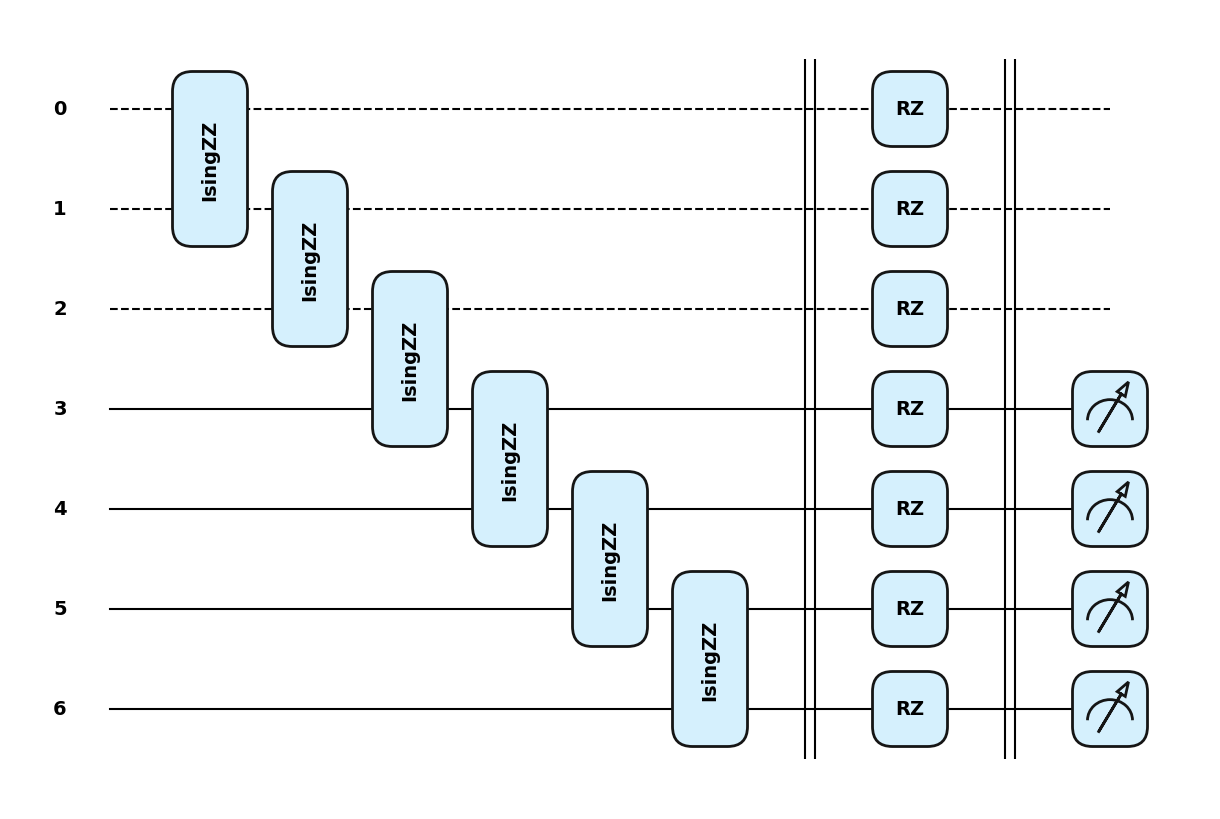

In [7]:
    
# --- Print the Circuit ---
wire_options = {
    #i: {'color': 'teal', 'linestyle': '--'} for i in discaded_wires # discarded wires
    i: {'linestyle': '--'} for i in discaded_wires # discarded wires
}

fig, ax = qml.draw_mpl(ising_like_circuit, style='pennylane', wire_options=wire_options)(j_param=j_coupling, hz_param=h_z_field)
#fig.suptitle("circuit")
plt.show()
